In [1]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# beer dataset
mall = pd.read_csv('../data/Mall_Customers.csv', sep=',')
mall.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [3]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
mall.set_index('CustomerID',inplace=True)

In [5]:
mall.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
mall.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [7]:
mall['Gender']=mall['Gender'].map({'Male':0,'Female':1}).astype(int)
mall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 7.8 KB


In [8]:
mall=mall.rename(columns={'Annual Income (k$)':'Income',
                          'Spending Score (1-100)':'spend_score'})

In [9]:
mall.head(2)

,Gender,Age,Income,spend_score
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81


In [10]:
#Statistical analysis
#Correlation matrix
correlation_matrix = mall.corr()
correlation_matrix

,Gender,Age,Income,spend_score
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Income,-0.056410,-0.012398,1.000000,0.009903
spend_score,0.058109,-0.327227,0.009903,1.000000


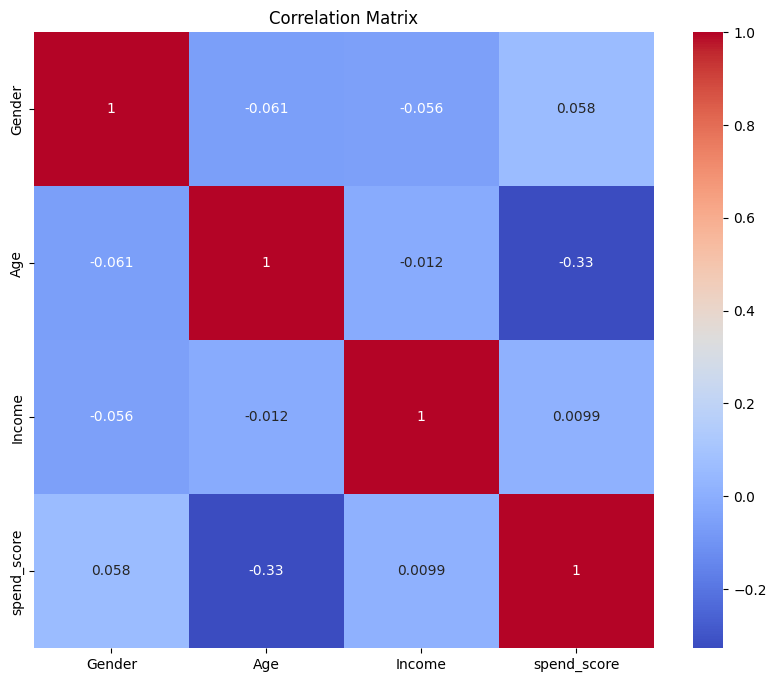

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
mall.head()

,Gender,Age,Income,spend_score
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


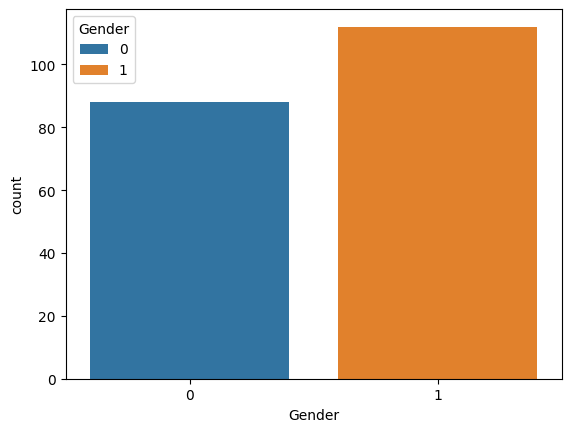

In [13]:
# Countplot
sns.countplot(x='Gender', hue='Gender', data=mall)
plt.show()

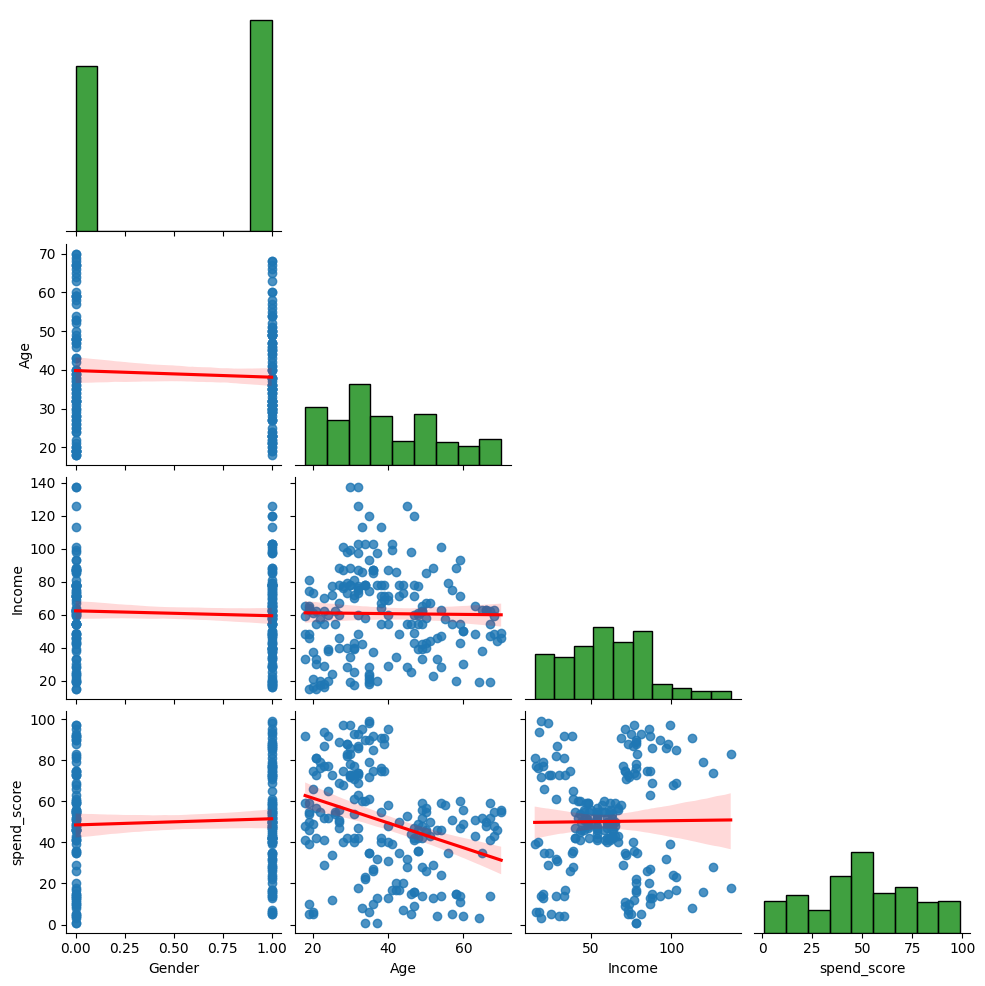

In [14]:
# Seaborn pairplot to create a scatter matrix 
# visualizing all continous variable relationships along with individiual distributions.

sns.pairplot(mall,
             diag_kws={'color':'green'},
             kind='reg',
             plot_kws={'line_kws':{'color': 'red'}},
             corner=True
            )
plt.show()

In [15]:
# Define X

X=mall

In [16]:
X.head(3)

,Gender,Age,Income,spend_score
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6


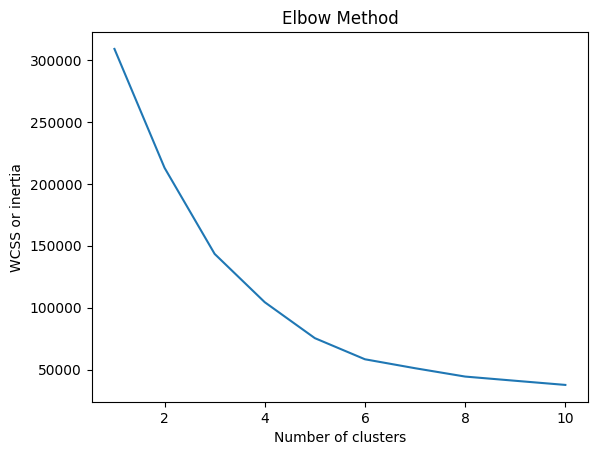

In [17]:
# Initialize empty list to store within-cluster sum of squares
wcss = []

# Calculate within-cluster sum of squares for different values of k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++', 
                    max_iter=300, 
                    n_init=10, 
                    random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS or inertia')
plt.show()

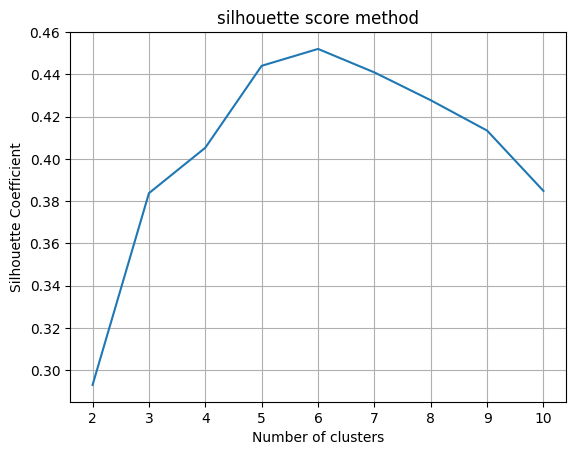

In [18]:
from sklearn import metrics


k_range = range(2, 11)
silhouette_scores = []
inertia_scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    silhouette_scores.append(metrics.silhouette_score(X, km.labels_))
   

# Plot the results
plt.plot(k_range, silhouette_scores)
plt.title('silhouette score method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [19]:
# K-means with 3 clusters
kmeans_3 = KMeans(n_clusters=3, n_init=1, random_state=1)
kmeans_3.fit(X)

KMeans(n_clusters=3, n_init=1, random_state=1)

In [20]:
# Review the cluster labels 
kmeans_3.labels_

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 2], dtype=int32)

In [21]:
mall['cluster'] = kmeans_3.labels_
mall.sort_values('cluster')

,Gender,Age,Income,spend_score,cluster
CustomerID,,,,,
1,0,19,15,39,0
32,1,21,30,73,0
34,0,18,33,92,0
36,1,21,33,81,0
38,1,30,34,73,0
...,...,...,...,...,...
164,1,31,81,93,2
166,1,36,85,75,2
168,1,33,86,95,2


In [22]:
# Review the cluster centers
kmeans_3.cluster_centers_

array([[ 0.62790698, 26.41860465, 33.8372093 , 65.39534884],
       [ 0.54310345, 45.53448276, 60.50862069, 34.30172414],
       [ 0.53658537, 32.97560976, 88.73170732, 79.24390244]])

In [23]:
centers = mall.groupby('cluster').mean()
centers

,Gender,Age,Income,spend_score
cluster,,,,
0,0.627907,26.418605,33.837209,65.395349
1,0.543103,45.534483,60.508621,34.301724
2,0.536585,32.975610,88.731707,79.243902


Text(0, 0.5, 'spend_score')

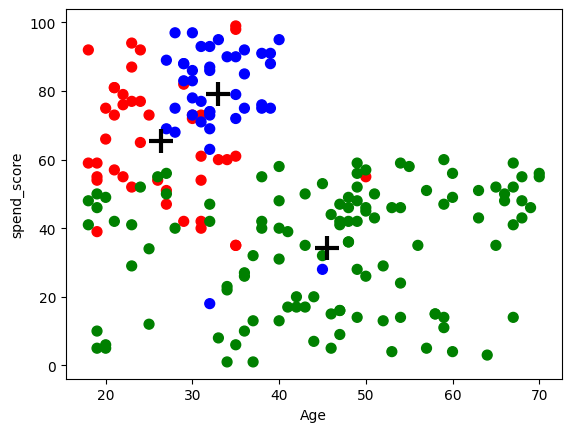

In [27]:
# Create colors array for plotting
colors = np.array(['red', 'green', 'blue'])
# Plot clusters with their centers
plt.scatter(mall.Age,
            mall.spend_score,
            c=colors[mall.cluster], 
            s=50)
plt.scatter(centers.Age, 
            centers.spend_score, 
            linewidths=3, marker='+', 
            s=300, 
            c='black')
plt.xlabel('Age')
plt.ylabel('spend_score')

array([[<Axes: xlabel='Gender', ylabel='Gender'>,
        <Axes: xlabel='Age', ylabel='Gender'>,
        <Axes: xlabel='Income', ylabel='Gender'>,
        <Axes: xlabel='spend_score', ylabel='Gender'>,
        <Axes: xlabel='cluster', ylabel='Gender'>],
       [<Axes: xlabel='Gender', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Income', ylabel='Age'>,
        <Axes: xlabel='spend_score', ylabel='Age'>,
        <Axes: xlabel='cluster', ylabel='Age'>],
       [<Axes: xlabel='Gender', ylabel='Income'>,
        <Axes: xlabel='Age', ylabel='Income'>,
        <Axes: xlabel='Income', ylabel='Income'>,
        <Axes: xlabel='spend_score', ylabel='Income'>,
        <Axes: xlabel='cluster', ylabel='Income'>],
       [<Axes: xlabel='Gender', ylabel='spend_score'>,
        <Axes: xlabel='Age', ylabel='spend_score'>,
        <Axes: xlabel='Income', ylabel='spend_score'>,
        <Axes: xlabel='spend_score', ylabel='spend_score'>,
        <Axes: xlabel='cluster'

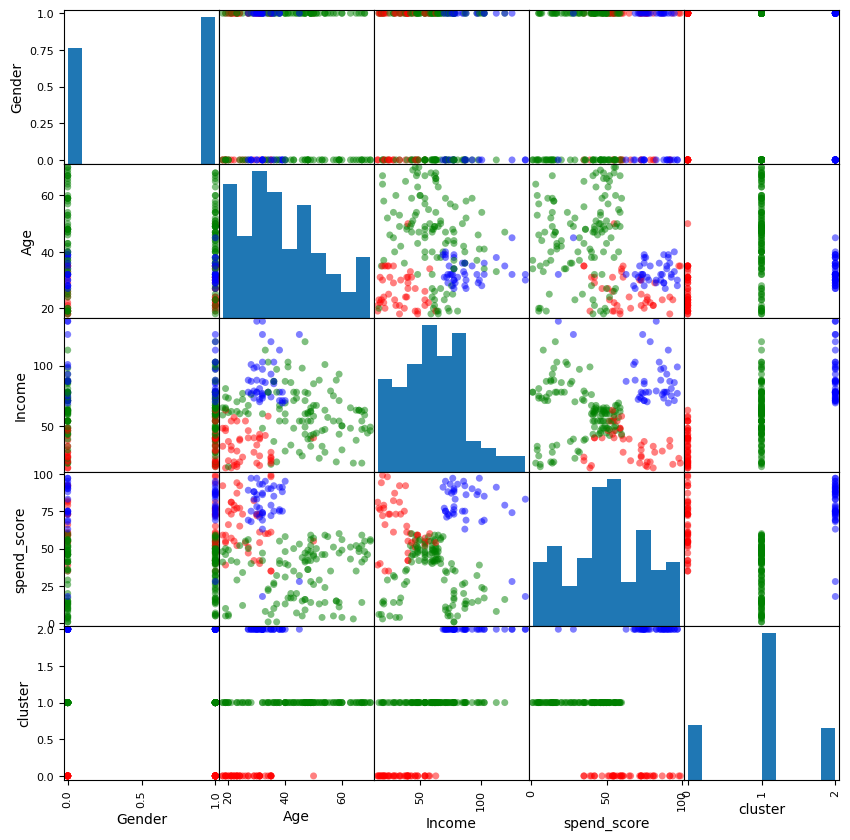

In [25]:
from pandas.plotting import scatter_matrix

# Scatter plot matrix
scatter_matrix(X, c=colors[mall.cluster], figsize=(10,10), s=100)